# LECTURA 1:INTRODUCCIÓN  A LA VISIÓN POR COMPUTADOR

En terminos simples, la visión por computador es la habilidad que tienen los computadores para "ver".

¡UNA IMÁGEN VALE MÁS QUE MIL PALABRAS!

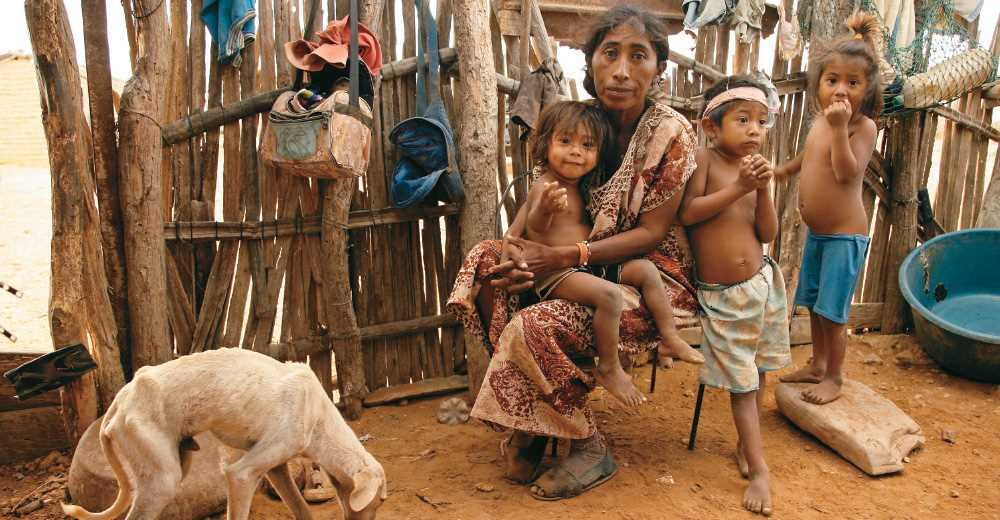

In [63]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# CARACTERÍSTICAS DE UNA IMAGEN

RESOLUCIÓN: me dice el número de filas y columnas de una imagen.

¿CUAL ES LA RESOLUCIÓN DE LA ANTERIOR IMAGEN?

In [64]:
I = cv.imread("/Users/Victor Manuel/Documents/John/IMG1.jpg")
print (I.shape)




(520, 1000, 3)


POR DEFECTO OPENCV MUESTRA LAS IMAGENES EN BGR

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 252 255]
  [255 253 255]
  [255 253 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 253 255]
  [255 253 255]
  [255 254 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 255]
  [255 254 255]
  [255 254 255]]

 ...

 [[ 42  84 143]
  [ 45  88 145]
  [ 52  92 150]
  ...
  [ 89 147 213]
  [ 82 140 206]
  [ 77 135 201]]

 [[ 37  82 143]
  [ 52  98 156]
  [ 62 106 165]
  ...
  [ 90 148 214]
  [ 83 141 207]
  [ 75 133 199]]

 [[ 68 115 176]
  [ 60 107 168]
  [ 56 101 162]
  ...
  [ 96 154 220]
  [ 88 146 212]
  [ 78 136 202]]]


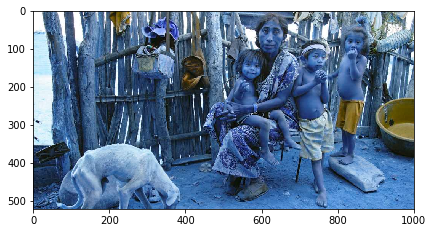

In [65]:
plt.figure(figsize=(15,20))
plt.subplot(121), plt.imshow(I) # <=============== BGR
print (I)

LA IMAGEN SE CONVIERTE BGR A RGB

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 252 255]
  [255 253 255]
  [255 253 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 253 255]
  [255 253 255]
  [255 254 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 255]
  [255 254 255]
  [255 254 255]]

 ...

 [[143  84  42]
  [145  88  45]
  [150  92  52]
  ...
  [213 147  89]
  [206 140  82]
  [201 135  77]]

 [[143  82  37]
  [156  98  52]
  [165 106  62]
  ...
  [214 148  90]
  [207 141  83]
  [199 133  75]]

 [[176 115  68]
  [168 107  60]
  [162 101  56]
  ...
  [220 154  96]
  [212 146  88]
  [202 136  78]]]


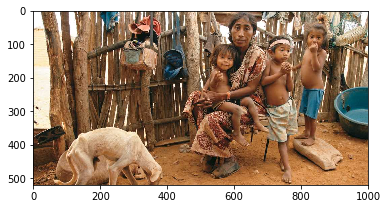

In [66]:
I2 = cv.cvtColor(I, cv.COLOR_BGR2RGB)
plt.imshow(I2)
print(I2)
#plt.subplot(122), plt.imshow(I[...,::-1]) # <===== RGB 
#plt.xticks(yticks[]), plt.([]);

# conversión a escala de grises

El ojo percibe distintas intesidades de luz en función del color que se observe, esto es debido a la respuesta del ojo al espectro visible, la cual se puede observar en la figura, por esa razón el cálculo del equivalente a escala de grises debe realizarse como una media ponderada de las distintas componentes de color de cada pixel.

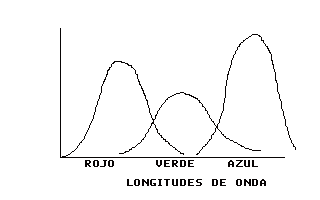

La ecuación de la luminancia nos muestra es la expresión matemática de ese fenómeno y los factores de ponderación de cada componente de color nos indican la sensibilidad del ojo humano a las frecuencias del espectro cercanas al rojo, verde y azul.

Y = R*0.3+G*0.59+B*0.11

In [67]:
Ig = 0.2989*I[:,:,2] + 0.5870*I[:,:,1] + 0.1140*I[:,:,0]

(520, 1000)
float64
uint8


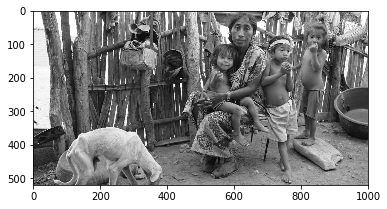

In [68]:
print(Ig.shape)
print(Ig.dtype)
Ig = Ig.astype(np.uint8)
print(Ig.dtype)
#plt.imshow(Ig)
plt.imshow(Ig, cmap='gray')
cv.imwrite("/Users/Victor Manuel/Documents/John/IMG1_gris.jpg",Ig);


In [69]:
print (Ig)

[[254 254 254 ... 253 253 253]
 [254 254 254 ... 253 253 254]
 [254 254 254 ... 254 254 254]
 ...
 [ 96 100 104 ... 160 153 148]
 [ 95 110 118 ... 161 154 146]
 [127 119 114 ... 167 159 149]]


# VIDEOS

16.0
1.0


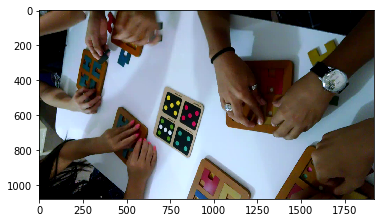

In [70]:
V = cv.VideoCapture("/Users/Victor Manuel/Documents/John/estudiantes.mp4")
ret,f = V.read()
plt.imshow(f[...,::-1]) #...,::- lo convierte RGB
print(V.get(cv.CAP_PROP_FRAME_COUNT)) #cuenta los frames
print(V.get(cv.CAP_PROP_POS_FRAMES))#'?'



In [71]:
 #bash command
!mkdir frames 

V.set(cv.CAP_PROP_POS_FRAMES, 0); 
ret,f = V.read()
counter = 0
while ret:
    counter += 1
    fname = "frames/frame"+str(counter)+".jpg"
    cv.imwrite(fname, f)
    print("Generating frame "+str(counter))
    ret,f = V.read()

Ya existe el subdirectorio o el archivo frames.


Generating frame 1
Generating frame 2
Generating frame 3
Generating frame 4
Generating frame 5
Generating frame 6
Generating frame 7
Generating frame 8
Generating frame 9
Generating frame 10
Generating frame 11
Generating frame 12
Generating frame 13
Generating frame 14
Generating frame 15
Generating frame 16


# LECTURA 2: FILTRADO.

HISTOGRAMA: Determina la distribución de color de una imagen.

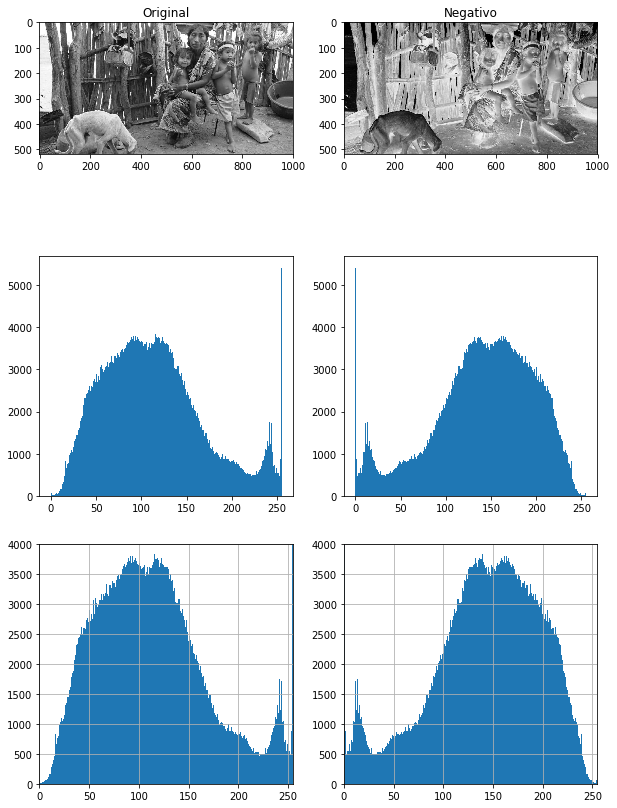

In [77]:
IMAGEN = cv.imread("/Users/Victor Manuel/Documents/John/IMG1.jpg",0) # <==== Read as grayscale image
NEGATIVO = 255-IMAGEN 
plt.figure(figsize=(10,15)) #DIMENSIONA LAS IMAGENES
plt.subplot(321), plt.imshow(IMAGEN,'gray'), plt.title('Original')# ;
plt.subplot(322), plt.imshow(NEGATIVO,'gray'), plt.title('Negativo');
plt.subplot(323), plt.hist(IMAGEN.ravel(),256);#EL NUMERO DEFINE LOS INTERVALOS.
plt.subplot(324), plt.hist(NEGATIVO.ravel(),256);#EL NUMERO DEFINE LOS INTERVALOS
plt.subplot(325), plt.hist(IMAGEN.ravel(),256), plt.axis([0,255,0,4e3]), plt.grid(True); 
plt.subplot(326), plt.hist(NEGATIVO.ravel(),256), plt.axis([0,255,0,4e3]),plt.grid(True);


# RUIDO

FUENTES DE RUIDO: Variaciones de la luz, superficie de reflactancia, camara, lentes.


TIPOS DE RUIDO

*RUIDO GAUSSIANO: Modela el ruido producido por los circuitos electrónicos o ruido de los sensores por falta de iluminación y/o
altas temperaturas.
La intensidad de todos los píxeles se ve afectada.

El ruido aditivo Gaussiano q es un modelo que permite simular la afectación aleatoria de los pixeles de una imagen con valores uniformemente distribuidos. Su función de densidad de probabilidad pq(x) viene dada en términos de la media 𝜇 y la varianza 𝜎2 de una variable aleatoria x. Se expresa en la siguiente ecuación

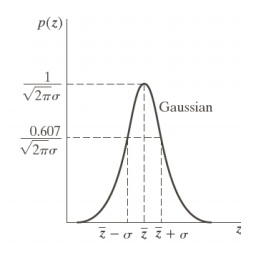

RUIDO IMPULSIVO (o sal y pimienta) Se produce normalmente en la cuantificación que se realiza en el proceso de digitalización.


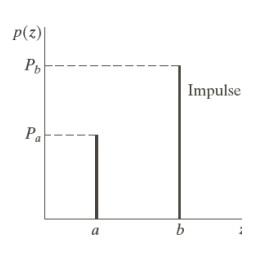

RUIDO UNIFORME:Toma valores en un determinado intervalo de forma equiprobable. Se da en un menor número de situaciones reales.

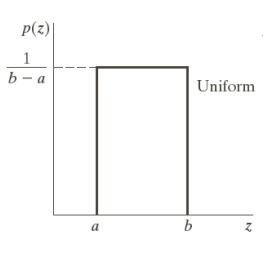

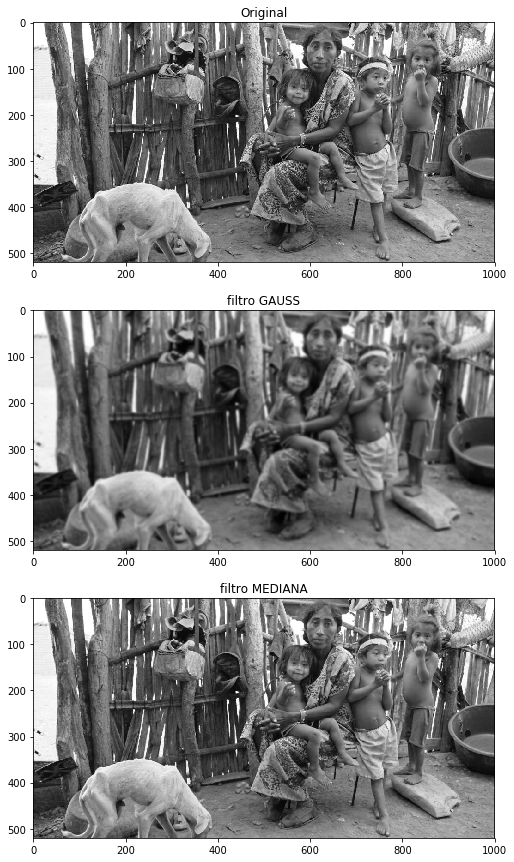

In [91]:
import scipy
from scipy import ndimage
plt.figure(figsize=(10,15)) #DIMENSIONA LAS IMAGENES
FGAUSS = ndimage.gaussian_filter(IMAGEN,2)
FMEDIANA = ndimage.median_filter (IMAGEN,2)
plt.subplot(311), plt.imshow(IMAGEN,'gray'), plt.title('Original');#IMAGEN ORIGINAL
plt.subplot(312), plt.imshow(FGAUSS,'gray'), plt.title('filtro GAUSS');#FILTRO GAUSSIANO (DIFUMINACIÓN DE BORDES)
plt.subplot(313), plt.imshow(FMEDIANA,'gray'),plt.title('filtro MEDIANA'); #FILTRO MEDIANA MENOR DIFUMINACIÓN DE BORDES.
#plt.imshow(gauss_denoised, cmap=plt.cm.gray, vmin=40, vmax=220)
#med_denoised = ndimage.median_filter(noisy, 3)